In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,Unnamed: 0,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math_score'])

In [5]:
X

,Unnamed: 0,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,0,female,group B,bachelor's degree,standard,none,72,74
1,1,female,group C,some college,standard,completed,90,88
2,2,female,group B,master's degree,standard,none,95,93
3,3,male,group A,associate's degree,free/reduced,none,57,44
4,4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,99,95
996,996,male,group C,high school,free/reduced,none,55,55
997,997,female,group C,high school,free/reduced,completed,71,65
998,998,female,group D,some college,standard,completed,78,77


In [6]:
Y = df['math_score']

In [7]:
Y


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [8]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X


array([[ 1.        ,  0.        ,  0.        , ..., -1.73031962,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ..., -1.72685552,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ..., -1.72339142,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.72339142,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  1.72685552,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.73031962,
         1.15336989,  1.18158627]], shape=(1000, 20))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 20), (200, 20))

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_sq = r2_score(true, predicted)
    return mae, mse, rmse, r2_sq

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mse, model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mse, model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('\n\n')
    



Linear Regression
Model performance for Training set
- Mean Squared Error: 4.2648
- Root Mean Squared Error: 5.3225
- Mean Absolute Error: 28.3289
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Squared Error: 4.2207
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 29.0952
- R2 Score: 0.8804



Lasso
Model performance for Training set
- Mean Squared Error: 5.2063
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 43.4784
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Mean Squared Error: 5.1579
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 42.5064
- R2 Score: 0.8253



Ridge
Model performance for Training set
- Mean Squared Error: 4.2635
- Root Mean Squared Error: 5.3228
- Mean Absolute Error: 28.3318
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Squared Error: 4.2180
- Root Mean Squared Error: 5.3905
- Mean Absolute Error: 29.0578
- 

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880587
0,Linear Regression,0.880433
5,Random Forest Regressor,0.859249
7,CatBoosting Regressor,0.857152
8,AdaBoost Regressor,0.845725
6,XGBRegressor,0.845719
1,Lasso,0.825320
3,K-Neighbors Regressor,0.768328
4,Decision Tree,0.753101


In [20]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the Linear Regression model is %.2f" % score)


Accuracy of the Linear Regression model is 88.04


Text(0, 0.5, 'Predicted')

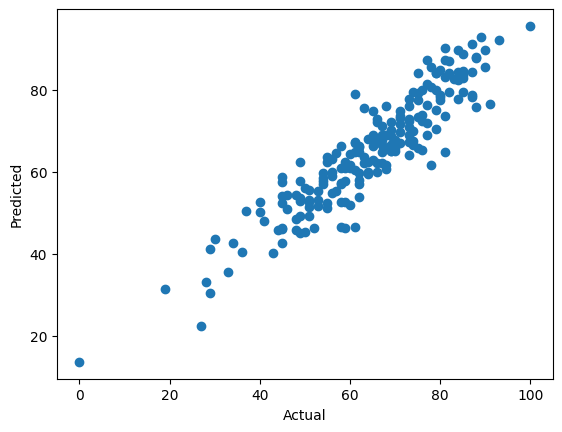

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

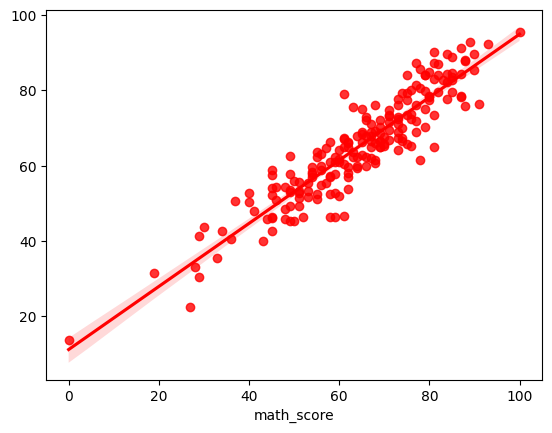

In [17]:
sns.regplot(x=y_test,y=y_pred,color ='red')     

In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.449341,14.550659
737,53,51.655659,1.344341
740,80,78.605186,1.394814
660,74,79.380310,-5.380310
411,84,84.299019,-0.299019
...,...,...,...
408,52,46.228020,5.771980
332,62,58.029915,3.970085
208,74,66.485413,7.514587
613,65,68.975189,-3.975189
